## Loading the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, 
                             roc_auc_score, roc_curve, precision_recall_curve, auc, accuracy_score)
from sklearn.datasets import load_iris, fetch_openml


## loading the dataset and printing the feature and class names

In [3]:
sns.set(style="whitegrid")
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names
print("Feature Names:", feature_names)
print("Class Names:", class_names)


Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class Names: ['setosa' 'versicolor' 'virginica']


## Split into training and test data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train the model

In [8]:
print("\n### One-vs-Rest Logistic Regression ###")
model_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs', random_state=42)
model_ovr.fit(X_train_scaled, y_train)

print("\n### Multinomial Logistic Regression ###")
model_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
model_multinomial.fit(X_train_scaled, y_train)


### One-vs-Rest Logistic Regression ###

### Multinomial Logistic Regression ###


c:\Users\raghu\100 days of ML\ML-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\raghu\100 days of ML\ML-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=42)

## Predictions and Evaluations

In [9]:
print("\n### Evaluation on Iris Dataset ###")
for model, name in zip([model_ovr, model_multinomial], ['OvR', 'Multinomial']):
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Logistic Regression Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))


### Evaluation on Iris Dataset ###
OvR Logistic Regression Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Multinomial Logistic Regression Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Reduce dimensions to 2D for visualization

c:\Users\raghu\100 days of ML\ML-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\raghu\100 days of ML\ML-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


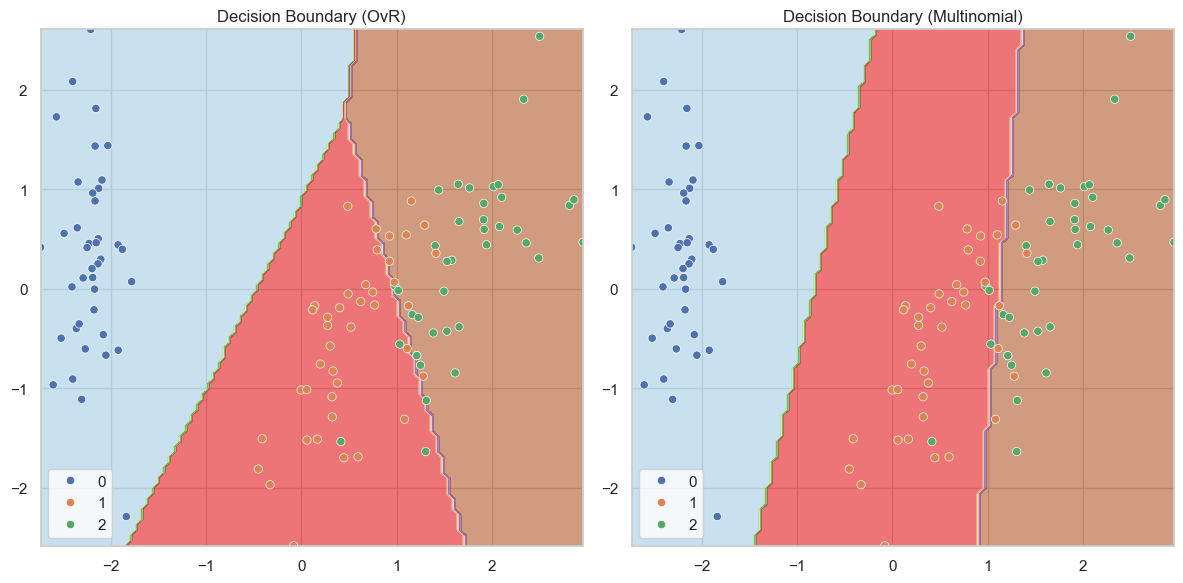

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model_ovr.fit(X_train_pca, y_train)
model_multinomial.fit(X_train_pca, y_train)

plt.figure(figsize=(12, 6))
for i, model in enumerate([model_ovr, model_multinomial]):
    plt.subplot(1, 2, i+1)
    xx, yy = np.meshgrid(np.linspace(X_train_pca[:, 0].min(), X_train_pca[:, 0].max(), 100),
                         np.linspace(X_train_pca[:, 1].min(), X_train_pca[:, 1].max(), 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='deep')
    plt.title(f"Decision Boundary ({['OvR', 'Multinomial'][i]})")
plt.tight_layout()
plt.show()

## Real World Application with MNIST dataset

In [11]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X_mnist, y_mnist = mnist.data, mnist.target.astype(int)

## sample the dataset for faster exection taking 10000 rows

In [14]:
X_mnist, y_mnist = X_mnist[:10000], y_mnist[:10000]

In [15]:
## Train and Test split

X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(
    X_mnist, y_mnist, test_size=0.2, random_state=42)


## Standardize features

In [16]:
scaler_mnist = StandardScaler()
X_train_mnist_scaled = scaler_mnist.fit_transform(X_train_mnist)
X_test_mnist_scaled = scaler_mnist.transform(X_test_mnist)

## Train Multinomial Regression

In [18]:
mnist_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
mnist_model.fit(X_train_mnist_scaled, y_train_mnist)

c:\Users\raghu\100 days of ML\ML-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

## Predictions and Evaluation

In [19]:
y_pred_mnist = mnist_model.predict(X_test_mnist_scaled)
mnist_accuracy = accuracy_score(y_test_mnist, y_pred_mnist)
print("\n### MNIST Dataset Evaluation ###")
print(f"Multinomial Logistic Regression Accuracy: {mnist_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test_mnist, y_pred_mnist))


### MNIST Dataset Evaluation ###
Multinomial Logistic Regression Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       207
           1       0.94      0.97      0.95       216
           2       0.88      0.81      0.84       204
           3       0.85      0.88      0.87       192
           4       0.95      0.91      0.93       211
           5       0.84      0.84      0.84       176
           6       0.94      0.93      0.94       220
           7       0.89      0.94      0.91       216
           8       0.85      0.84      0.84       166
           9       0.87      0.87      0.87       192

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



## Advanced feature engineering 

In [20]:
## Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_poly = poly.fit_transform(X)
print(f"Original feature shape: {X.shape}, After Polynomial Transformation: {X_poly.shape}")

# Train-test split for polynomial features
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Standardize polynomial features
scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

# Train Logistic Regression on Polynomial Features
poly_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
poly_model.fit(X_train_poly_scaled, y_train_poly)

# Evaluation
y_pred_poly = poly_model.predict(X_test_poly_scaled)
poly_accuracy = accuracy_score(y_test_poly, y_pred_poly)
print("\n### Polynomial Features Evaluation ###")
print(f"Accuracy with Polynomial Features: {poly_accuracy:.2f}")


Original feature shape: (150, 4), After Polynomial Transformation: (150, 15)

### Polynomial Features Evaluation ###
Accuracy with Polynomial Features: 1.00


c:\Users\raghu\100 days of ML\ML-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
